In [1]:
import pandas as pd

df_08 = pd.read_csv('all_alpha_08.csv')
df_08 = df_08.drop(columns=['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'])
df_08.columns = [c.lower().replace(' ', '_') for c in df_08]
df_08 = df_08[df_08['sales_area'] == 'CA'].drop(columns=['sales_area'])
df_08 = df_08.dropna().drop_duplicates()
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

hb_08 = df_08[df_08['fuel'].str.contains('/')]
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])    
    
df_08 = df_08.drop(hb_08.index).append([df1, df2], ignore_index=True)

to_float_columns = ['air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in to_float_columns:
    df_08[c] = df_08[c].astype(float)
    
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

df_08.tail()


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13.0,19.0,15.0,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no
986,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,21.0,6,no


In [2]:
df_18 = pd.read_csv('all_alpha_18.csv')
df_18 = df_18.drop(columns=['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'])
df_18.columns = [c.lower().replace(' ', '_') for c in df_18]
df_18 = df_18[df_18['cert_region'] == 'CA'].drop(columns=['cert_region'])
df_18 = df_18.dropna().drop_duplicates()
df_18['cyl'] = df_18['cyl'].astype(int)
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

hb_18 = df_18[df_18['fuel'].str.contains('/')]
df1 = hb_18.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_18.copy()  # data on second fuel type of each hybrid vehicle

# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    
    
df_18 = df_18.drop(hb_18.index).append([df1, df2], ignore_index=True)

to_float_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in to_float_columns:
    df_18[c] = df_18[c].astype(float)

df_18['greenhouse_gas_score'] = df_18['greenhouse_gas_score'].astype(int)
#df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].str.extract(r'(\d+)').astype(int)
#for column in ['air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg']:
    #Extract the first integer in the case of a double rating of the form: d/d
#    df_08[column] = df_08[column].str.extract(r'(\d+)').astype(float)


df_18.tail()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1378,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5.0,13.0,17.0,14.0,1,No
1379,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5.0,13.0,17.0,15.0,2,No
1380,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7.0,70.0,72.0,71.0,10,Elite
1381,VOLVO XC60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7.0,60.0,58.0,59.0,10,Elite
1382,VOLVO XC90,2.0,4,SemiAuto-8,4WD,Electricity,standard SUV,7.0,63.0,61.0,62.0,10,Elite


In [3]:
type(df_08['greenhouse_gas_score'][0])
df_08['air_pollution_score'].value_counts()
df_08.shape

(987, 13)

In [4]:
type(df_18['air_pollution_score'][0])
df_18['air_pollution_score'].value_counts()
df_18.shape

(1383, 13)

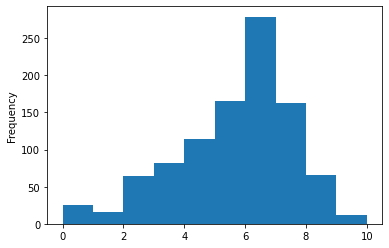

In [5]:
df_08['greenhouse_gas_score'].plot.hist();

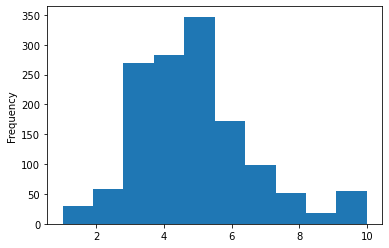

In [6]:
df_18['greenhouse_gas_score'].plot.hist();

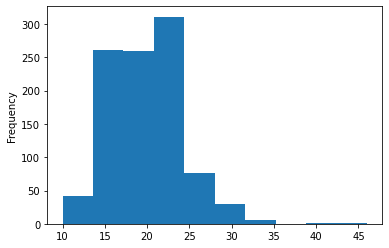

In [7]:
df_08['cmb_mpg'].plot.hist();

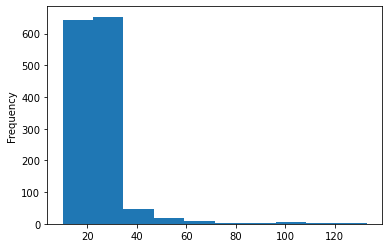

In [8]:
df_18['cmb_mpg'].plot.hist();

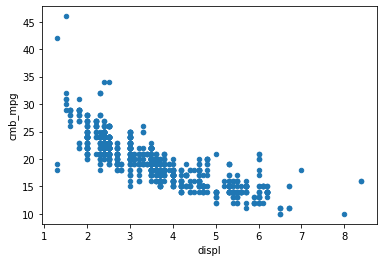

In [9]:
df_08.plot.scatter(x='displ', y='cmb_mpg');

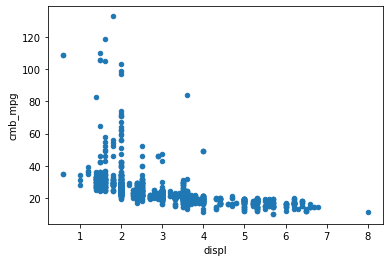

In [10]:
df_18.plot.scatter(x='displ', y='cmb_mpg');

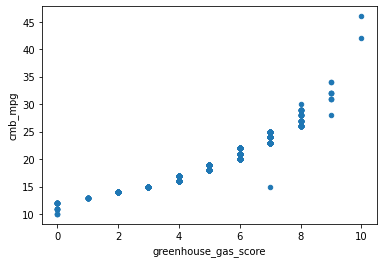

In [11]:
df_08.plot.scatter(x='greenhouse_gas_score', y='cmb_mpg');

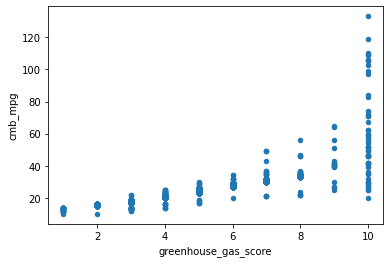

In [12]:
df_18.plot.scatter(x='greenhouse_gas_score', y='cmb_mpg');

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [13]:
df_08[df_08['fuel'] != 'Gasoline'].shape

(3, 13)

In [16]:
df_18[df_18['fuel'] != 'Gasoline'].shape

(154, 13)

In [17]:
df_08.groupby('veh_class')['cmb_mpg'].mean().sort_values()

veh_class
van              14.952381
pickup           16.277108
SUV              18.471429
large car        18.509091
minivan          19.117647
small car        21.105105
midsize car      21.601449
station wagon    22.366667
Name: cmb_mpg, dtype: float64

In [18]:
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)

df_18_SUV_cmb = df_18.copy()

df_18_SUV_cmb['veh_class'] = df_18_SUV_cmb['veh_class'].replace({'small SUV': 'SUV', 'standard SUV': 'SUV'})
#df_18_mean_mpg = df_18.groupby('veh_class')['cmb_mpg'].mean()
#df_18_mean_mpg['SUV']

df_18_SUV_cmb.groupby('veh_class')['cmb_mpg'].mean() - df_08.groupby('veh_class')['cmb_mpg'].mean()

veh_class
SUV                3.952655
large car          5.922416
midsize car        8.568275
minivan            8.049020
pickup             1.972892
small car          4.568654
special purpose         NaN
station wagon      7.687879
van                1.047619
Name: cmb_mpg, dtype: float64

In [19]:
df_08.groupby('smartway').mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
no,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
yes,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421


In [20]:
df_18.groupby('smartway').mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
Elite,1.802174,3.913043,7.043478,62.956522,60.326087,61.565217,10.000000
No,3.246701,5.759212,3.838903,19.264781,26.410454,21.904027,4.209940
Yes,1.922353,4.229412,4.776471,31.617647,39.000000,34.458824,7.641176


In [21]:
df_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,3.497062,6.022290,6.706180,17.386018,24.038501,19.788247,5.196555
std,1.241483,1.860094,0.983016,4.088018,4.753406,4.251565,1.909692
min,1.300000,2.000000,4.000000,8.000000,13.000000,10.000000,0.000000
25%,2.500000,4.000000,6.000000,15.000000,20.000000,17.000000,4.000000
50%,3.500000,6.000000,6.000000,17.000000,24.000000,20.000000,6.000000
75%,4.200000,6.000000,7.000000,20.000000,27.000000,22.000000,6.000000
max,8.400000,16.000000,9.500000,48.000000,45.000000,46.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [26]:
df_08_merge = df_08.rename(columns=lambda s: '{}_08'.format(s))
df_18_merge = df_18.rename(columns=lambda s: '{}_18'.format(s))
df = pd.merge(df_08_merge, df_18_merge, left_on='model_08', right_on='model_18', how='inner')
df

,model_08,displ_08,cyl_08,trans_08,drive_08,fuel_08,veh_class_08,air_pollution_score_08,city_mpg_08,hwy_mpg_08,...,trans_18,drive_18,fuel_18,veh_class_18,air_pollution_score_18,city_mpg_18,hwy_mpg_18,cmb_mpg_18,greenhouse_gas_score_18,smartway_18
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
4,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,30.0,25.0,5,No
1450,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,...,Auto-9,2WD,Gasoline,small car,5.0,24.0,33.0,27.0,6,No
1451,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,29.0,25.0,5,No
1452,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,...,Auto-9,2WD,Gasoline,small car,5.0,22.0,30.0,25.0,5,No


In [23]:
df_08[df_08['model'] == 'MERCEDES-BENZ C300']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no
986,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,21.0,6,no


In [24]:
df_18[df_18['model'] == 'MERCEDES-BENZ C300']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
876,MERCEDES-BENZ C300,2.0,4,Auto-9,2WD,Gasoline,small car,5.0,22.0,29.0,25.0,5,No
877,MERCEDES-BENZ C300,2.0,4,Auto-9,2WD,Gasoline,small car,5.0,22.0,30.0,25.0,5,No
878,MERCEDES-BENZ C300,2.0,4,Auto-9,2WD,Gasoline,small car,5.0,24.0,33.0,27.0,6,No


In [41]:
model_mpg = df.groupby('model_08').mean()
model_mpg = model_mpg.assign(cmb_mpg_change=lambda x: x.cmb_mpg_18 - x.cmb_mpg_08)
model_mpg.sort_values(by='cmb_mpg_change', ascending=False)

,displ_08,cyl_08,air_pollution_score_08,city_mpg_08,hwy_mpg_08,cmb_mpg_08,greenhouse_gas_score_08,displ_18,cyl_18,air_pollution_score_18,city_mpg_18,hwy_mpg_18,cmb_mpg_18,greenhouse_gas_score_18,cmb_mpg_change
model_08,,,,,,,,,,,,,,,
CHEVROLET Malibu,3.166667,5.333333,6.333333,19.000000,28.333333,22.333333,6.333333,1.70,4.0,5.250000,31.25,36.750000,33.000000,7.250000,10.666667
HONDA Accord,2.900000,4.909091,7.909091,20.090909,29.363636,23.090909,6.545455,1.75,4.0,6.666667,29.50,36.833333,32.333333,7.166667,9.242424
CHEVROLET Equinox,3.500000,6.000000,6.500000,16.500000,24.000000,19.000000,5.000000,1.70,4.0,4.333333,25.00,32.666667,27.833333,5.500000,8.833333
AUDI S4,4.200000,8.000000,6.000000,13.500000,20.500000,15.500000,3.500000,3.00,6.0,5.000000,21.00,30.000000,24.000000,5.000000,8.500000
LEXUS GS 450h,3.500000,6.000000,9.000000,22.000000,25.000000,23.000000,7.000000,3.50,6.0,7.000000,29.00,34.000000,31.000000,7.000000,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMW 750i,4.800000,8.000000,7.000000,17.000000,25.000000,20.000000,6.000000,4.40,8.0,3.000000,16.50,25.000000,19.500000,3.500000,-0.500000
FORD Taurus,3.500000,6.000000,9.500000,17.500000,26.000000,20.500000,5.500000,3.50,6.0,3.000000,17.00,25.000000,19.666667,3.333333,-0.833333
MASERATI Granturismo,4.200000,8.000000,6.000000,14.000000,21.000000,17.000000,4.000000,4.70,8.0,1.000000,13.00,21.000000,16.000000,2.000000,-1.000000


In [43]:
df_08[df_08['model'] == 'CHEVROLET Malibu']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
177,CHEVROLET Malibu,3.5,6,Auto-L4,2WD,Gasoline,midsize car,7.0,18.0,29.0,22.0,6,yes
178,CHEVROLET Malibu,2.4,4,Auto-L4,2WD,Gasoline,midsize car,6.0,22.0,30.0,25.0,7,yes
179,CHEVROLET Malibu,3.6,6,Auto-S6,2WD,Gasoline,midsize car,6.0,17.0,26.0,20.0,6,no
